In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Loading in data

In [6]:
anthropic_df = pd.read_csv("anthropic_mongodb_evals.csv")
bedrock_df = pd.read_csv("final_bedrock_mongodb_evals.csv")

In [7]:
bedrock_df.head(5)

,input_question,target_mongodb_query,target_python,target_answer,predicted_answer,data_source,generation_time,response_evaluation,response_score,predicted_mongodb_query,mongodb_evaluation,mongodb_score,tool_output_size,query_type
0,Generate code to find experiments where the an...,"{""agg_pipeline"":[{""$match"":{""procedures.subjec...",import json\nfrom aind_data_access_api.documen...,I'll create a MongoDB aggregation pipeline to ...,I'll help you generate code to find experiment...,NaN,76.174700,CORRECT,1,{'agg_pipeline': [{'$match': {'procedures.subj...,CORRECT,1,22794,analysis
1,What are the injections for SmartSPIM_675387_2...,"{""filter"":{""name"":""SmartSPIM_675387_2023-05-23...",import json\n\nfrom aind_data_access_api.docum...,\n Based on the provided co...,Based on the retrieved document for SmartSPIM_...,NaN,18.852197,CORRECT,1,{'filter': {'name': 'SmartSPIM_675387_2023-05-...,CORRECT,1,2929,anatomical_coordinates
2,what are the modalities of the assets for the ...,agg_pipeline = [\n {'$match': {'data_descri...,import json\nfrom collections import Counter\n...,"""Selective plane illumination microscopy"", is...",Based on the retrieved results for the 'U19 Th...,NaN,24.567656,CORRECT,1,{'agg_pipeline': [{'$match': {'data_descriptio...,CORRECT,1,198,project
3,can you tell me how many sessions exist for 77...,"filter = {""subject.subject_id"": ""775745""}\npro...",import json\nfrom aind_data_access_api.documen...,There are 8 sessions for subject 775745,"Based on the retrieved documents, there are 8 ...",NaN,16.950946,CORRECT,1,"{'filter': {'subject.subject_id': '775745'}, '...",CORRECT,1,888,experimental_details
4,Give me the query used to identify 5 subject I...,"agg_pipeline = [\n {\n ""$match"": {\n...",import json\nfrom aind_data_access_api.documen...,import json\nfrom aind_data_access_api.documen...,I'll provide a complete Python implementation ...,NaN,50.701288,CORRECT,1,{'agg_pipeline': [{'$match': {'subject.subject...,CORRECT,1,709,analysis


In [8]:
bedrock_df["query_type"].value_counts()

query_type
analysis                  11
anatomical_coordinates     7
project                    7
experimental_details       7
database                   7
instrument                 5
subject                    5
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x263dbe29c90>,
 [Text(0.8375905603371303, 0.7130512276366491, 'Analysis'),
  Text(-0.312980348316564, 1.0545346374432858, 'Experiment details'),
  Text(-1.0196084508273997, 0.41279366153242975, 'Database level'),
  Text(-0.9584505296697166, -0.539789386868471, 'Project level'),
  Text(-0.1755597507067299, -1.0858999833924812, 'Anatomical/ Coordinates'),
  Text(0.6293284653359678, -0.9021893829556386, 'Subject level'),
  Text(1.043961382809114, -0.3466188558103593, 'Instrument')])

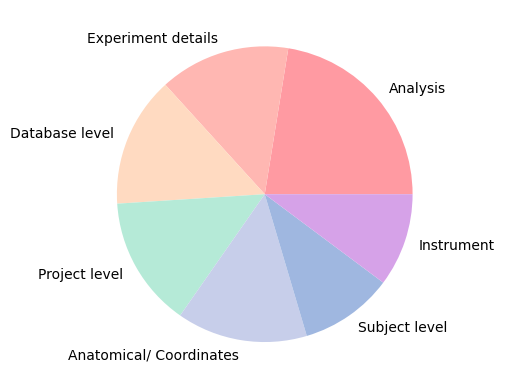

In [22]:
import matplotlib.pyplot as plt

labels = 'Analysis', "Experiment details","Database level", "Project level", "Anatomical/ Coordinates", "Subject level", "Instrument"
sizes = bedrock_df["query_type"].value_counts().tolist()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,
       colors=[
    '#FF9AA2',  # soft pink
    '#FFB7B2',  # light salmon
    '#FFDAC1',  # pale peach
    '#B5EAD7',  # seafoam green
    '#C7CEEA',  # periwinkle
    '#9FB7E0',  # soft blue
    '#D6A2E8',  # lavender
    '#F8C8DC'   # rose
])

In [10]:
bedrock_df[["query_type", "response_score", "generation_time", "tool_output_size"]].groupby("query_type").mean()

,response_score,generation_time,tool_output_size
query_type,,,
analysis,0.545455,40.386014,2382.363636
anatomical_coordinates,0.714286,21.546845,56671.285714
database,0.714286,23.074181,3082.000000
experimental_details,0.714286,13.644871,4033.571429
instrument,1.000000,21.034958,2621.000000
project,0.714286,17.494495,13719.571429
subject,0.800000,17.290422,1386.000000


In [11]:
bedrock_df['response_evaluation'].value_counts()

response_evaluation
CORRECT      35
ERROR         8
INCORRECT     6
Name: count, dtype: int64

In [12]:
bedrock_df['response_score'].mean()

0.7142857142857143

In [14]:
one_hot_df = pd.get_dummies(bedrock_df['response_evaluation'], dtype=float)
bedrock_df = pd.concat([bedrock_df, one_hot_df], axis = 1)
bedrock_df[["query_type", "response_score", "generation_time", "tool_output_size", "ERROR"]].groupby("query_type").mean()

,response_score,generation_time,tool_output_size,ERROR
query_type,,,,
analysis,0.545455,40.386014,2382.363636,0.272727
anatomical_coordinates,0.714286,21.546845,56671.285714,0.142857
database,0.714286,23.074181,3082.000000,0.000000
experimental_details,0.714286,13.644871,4033.571429,0.285714
instrument,1.000000,21.034958,2621.000000,0.000000
project,0.714286,17.494495,13719.571429,0.285714
subject,0.800000,17.290422,1386.000000,0.000000


<Axes: xlabel='tool_output_size', ylabel='generation_time'>

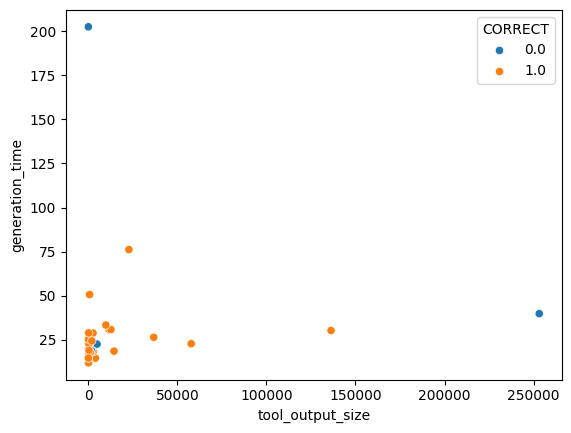

In [25]:
sns.scatterplot(data=bedrock_df.where(bedrock_df['response_evaluation']!= "ERROR"), x="tool_output_size", y="generation_time", hue = "CORRECT")

In [16]:
bedrock_df[["tool_output_size", "INCORRECT"]].groupby("INCORRECT").mean()

,tool_output_size
INCORRECT,
0.0,7620.767442
1.0,43515.500000


<Axes: xlabel='tool_output_size', ylabel='response_evaluation'>

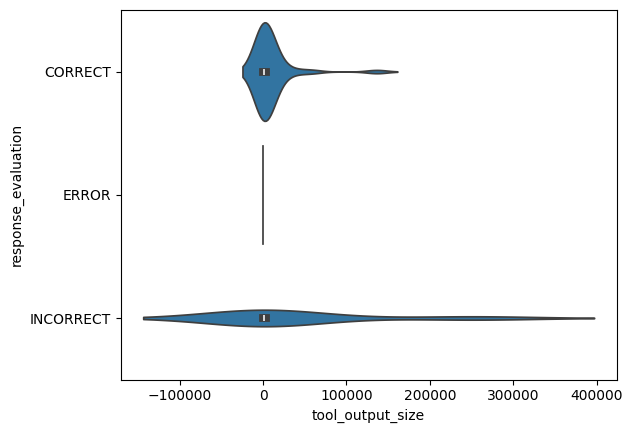

In [21]:
sns.violinplot(data=bedrock_df, x="tool_output_size", y="response_evaluation")

The mean answer generation time through anthropic is 28.638922000975608


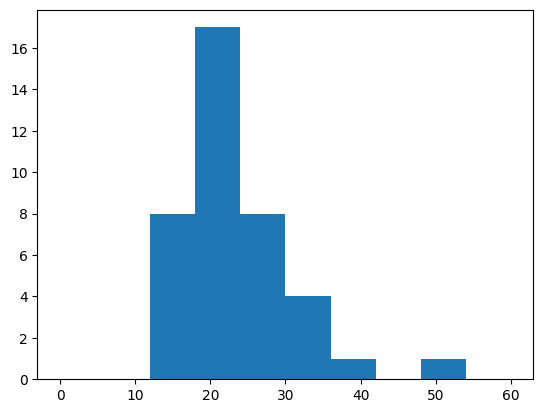

In [27]:
anthropic_no_error_df = bedrock_df.where(bedrock_df['response_evaluation']!= "ERROR")
print(f"The mean answer generation time through anthropic is {anthropic_no_error_df.loc[:, 'generation_time'].mean()}")
plt.hist(anthropic_no_error_df['generation_time'], range = (0,60))
plt.show()

<Axes: xlabel='generation_time', ylabel='Count'>

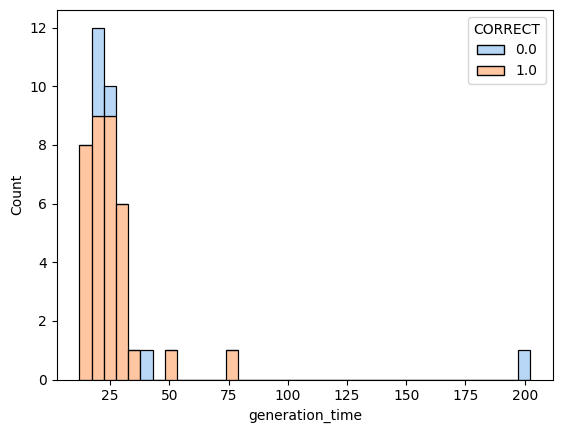

In [33]:
sns.histplot(data=anthropic_no_error_df, x="generation_time", hue="CORRECT", multiple = "stack", palette="pastel")


### Preprocessing to combine dfs

In [3]:
combined_df = anthropic_df.rename(
    columns={
        "generation_time": "anthropic_generation_time",
        "mongodb_evaluation": "anthropic_mongodb_evaluation",
        "mongodb_score": "anthropic_mongodb_score",
        "response_evaluation": "anthropic_response_evaluation",
        "response_score": "anthropic_response_score",
    }
)

bedrock_df = bedrock_df.rename(
    columns={
        "generation_time": "bedrock_generation_time",
        "mongodb_evaluation": "bedrock_mongodb_evaluation",
        "mongodb_score": "bedrock_mongodb_score",
        "response_evaluation": "bedrock_response_evaluation",
        "response_score": "bedrock_response_score",
    }
)

combined_df["bedrock_generation_time"] = bedrock_df["bedrock_generation_time"]
combined_df["bedrock_mongodb_evaluation"] = bedrock_df["bedrock_mongodb_evaluation"]
combined_df["bedrock_mongodb_score"] = bedrock_df["bedrock_mongodb_score"]
combined_df["bedrock_response_evaluation"] = bedrock_df["bedrock_response_evaluation"]
combined_df["bedrock_response_score"] = bedrock_df["bedrock_response_score"]

combined_df.head(5)

,input_question,target_mongodb_query,target_answer,predicted_answer,predicted_mongodb_query,anthropic_generation_time,anthropic_mongodb_evaluation,anthropic_mongodb_score,anthropic_response_evaluation,anthropic_response_score,bedrock_generation_time,bedrock_mongodb_evaluation,bedrock_mongodb_score,bedrock_response_evaluation,bedrock_response_score
0,for mouse 721291 can you make a table of sessi...,"{""filter"":{""subject.subject_id"":""721291""},""pro...","Sessions for Mouse 721291\n Session, Date, Ses...",I'll create an aggregation pipeline to retriev...,"{'filter': {'subject.subject_id': '721291'}, '...",45.258800,CORRECT,1.0,INCORRECT,0.0,27.374631,CORRECT,1.0,INCORRECT,0.0
1,Tell me about mouse 747107,"{""subject.subject_id"": ""747107""}",Mouse 747107 is a female Mus musculus with the...,I'll help you retrieve the details for mouse 7...,"{'filter': {'subject.subject_id': '747107'}, '...",11.560473,CORRECT,1.0,INCORRECT,0.0,21.749024,CORRECT,1.0,CORRECT,1.0
2,How many records use the session.data_streams....,"{""agg_pipeline"":[{""$match"":{""session.data_stre...",there are 5488 records with session.data_strea...,Here's a query to count records that have a no...,{'agg_pipeline': [{'$match': {'session.data_st...,10.611998,CORRECT,1.0,CORRECT,1.0,19.400605,CORRECT,1.0,CORRECT,1.0
3,can you tell me how many sessions exist for 77...,"filter = {""subject.subject_id"": ""775745""}\npro...",There are 50 sessions for subject 775745,I'll help you count the number of sessions for...,{'agg_pipeline': [{'$match': {'subject.subject...,10.799716,CORRECT,1.0,INCORRECT,0.0,15.529134,CORRECT,1.0,INCORRECT,0.0
4,Find how many experimental sessions conducted ...,"{""agg_pipeline"":[{""$match"":{""$or"":[{""acquisiti...",86 sessions were conducted by Marton Rozsa,"Error: Error code: 400 - {'type': 'error', 'er...","Error: Error code: 400 - {'type': 'error', 'er...",10.799716,ERROR,0.0,ERROR,0.0,15.529134,ERROR,0.0,ERROR,0.0


In [4]:
combined_df.shape

(45, 15)

## Analysis

In [5]:
combined_df['anthropic_mongodb_evaluation'].value_counts()

anthropic_mongodb_evaluation
CORRECT      22
INCORRECT    14
ERROR         9
Name: count, dtype: int64

In [6]:
combined_df['bedrock_mongodb_evaluation'].value_counts()

bedrock_mongodb_evaluation
CORRECT      23
INCORRECT    12
ERROR        10
Name: count, dtype: int64

In [8]:
combined_df['anthropic_response_evaluation'].value_counts()

anthropic_response_evaluation
INCORRECT    31
ERROR         8
CORRECT       6
Name: count, dtype: int64

In [7]:
combined_df['bedrock_response_evaluation'].value_counts()

bedrock_response_evaluation
CORRECT      24
INCORRECT    11
ERROR        10
Name: count, dtype: int64